In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

# Introduccion
En todos los entrenamientos de nuestros trabajos anteriores siempre utilizamos el train_test_split como validacion de nuestro algoritmo, comparemos los resultados que obtivimos con los que obtendremos utilizando validacion curzada.

In [33]:
# Dataset
CBP = pd.read_csv('https://media.githubusercontent.com/media/Gonzalo-Ariel-Alonso/Proyecto_Data_Science/master/Company%20Bankruptcy%20Prediction.csv')
CBP 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [29]:
# Escalado de datos
from sklearn.preprocessing import MinMaxScaler as MMS
scaler = MMS()
CBP_scaled = scaler.fit_transform(CBP)
CBP_scaled = pd.DataFrame(CBP_scaled, columns = list(CBP.columns))

In [30]:
# Columnas mas importantes
CBP_scaled_filtered = CBP_scaled[['Bankrupt?',' Debt ratio %',' Current Liability to Assets',' Net Income to Total Assets',' ROA(A) before interest and % after tax',' Net worth/Assets',' Persistent EPS in the Last Four Seasons']]
CBP_scaled_filtered

,Bankrupt?,Debt ratio %,Current Liability to Assets,Net Income to Total Assets,ROA(A) before interest and % after tax,Net worth/Assets,Persistent EPS in the Last Four Seasons
0,1.0,0.207576,0.147308,0.716845,0.424389,0.792424,0.169141
1,1.0,0.171176,0.056963,0.795297,0.538214,0.828824,0.208944
2,1.0,0.207516,0.098162,0.774670,0.499019,0.792484,0.180581
3,1.0,0.151465,0.098715,0.739555,0.451265,0.848535,0.193722
4,1.0,0.106509,0.110195,0.795016,0.538432,0.893491,0.212537
...,...,...,...,...,...,...,...
6814,0.0,0.124618,0.103838,0.799927,0.539468,0.875382,0.216602
6815,0.0,0.099253,0.089901,0.799748,0.538269,0.900747,0.216697
6816,0.0,0.038939,0.024414,0.797778,0.533744,0.961061,0.210929
6817,0.0,0.086979,0.083199,0.811808,0.559911,0.913021,0.228326


In [31]:
# Separacion de variables independientes de las dependiente
x = CBP_scaled_filtered.iloc[:,1:]
y = CBP_scaled_filtered.iloc[:,0]

In [32]:
# Balanceo de clases
from imblearn.over_sampling import SMOTE
os = SMOTE()
x_os , y_os = os.fit_resample(x,y)

# Muestra balanceada
count = Counter(y_os)
count

Counter({1.0: 6599, 0.0: 6599})

# Train test split

In [11]:
# Separacion de datos de prueba y entrenamiento
X_train, X_test , y_train , y_test = train_test_split(x_os , y_os ,test_size = 0.2)

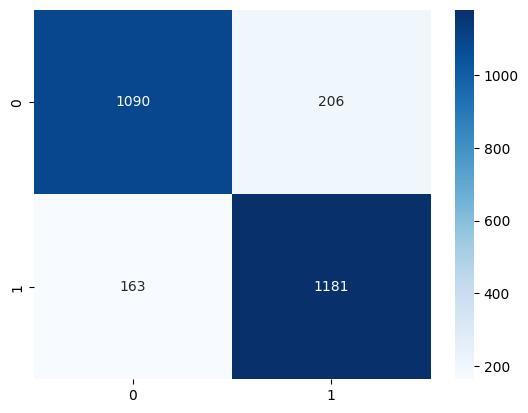

In [12]:
LR =  LogisticRegression()
LR.fit(X_train,y_train)

# Prediccion 2
y_pred = LR.predict(X_test)

# Matriz de confucion
cm_2 = confusion_matrix(y_test, y_pred)
sns.heatmap(data = cm_2, annot = True,cmap='Blues', fmt='g')
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      1296
         1.0       0.85      0.88      0.86      1344

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640



# Cross Validation

In [16]:
kf = KFold(10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [26]:
results = cross_val_score(LR , x , y , cv = kf) 

print("Puntuaciones de rendimiento:\n", results)
print("\nPuntuación promedio:", results.mean())
print("Desviación estándar de las puntuaciones:", results.std())

Puntuaciones de rendimiento:
 [0.95014663 0.95454545 0.92082111 0.95601173 0.98093842 0.98387097
 0.98680352 0.98680352 0.98826979 0.98091043]

Puntuación promedio: 0.9689121569539362
Desviación estándar de las puntuaciones: 0.0213658414949841


# Conclusiones
Coparando los resultados de ambas validaciones podemos observar una mejora subtancial (alrededor del 9%) utilizando validacion cruzada, resutlado esperable ya que es un metodo de validacion que al tener multiples comparaciones entre si da un resultado con un sesgo mucho menor.